In [122]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [123]:
def latent_func(x, y):
    return np.sin(np.pi * np.sqrt(((x - 0.5) ** 2 + (y - 0.5) ** 2) / 0.5))
   
print(latent_func(0., 0))

1.2246467991473532e-16


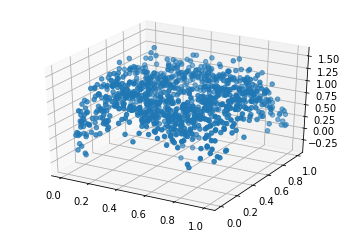

In [124]:
def gen_data(total_example_count, noise_sigma):
    # generate random points in 0 <= x, y <= 1
    X = np.random.random_sample((total_example_count, 2))
    y = np.asarray(list(map(lambda xy: [latent_func(xy[0], xy[1]) + random.gauss(0, noise_sigma)], X)))
    return X, y

X, y = gen_data(1000, 0.2)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(X.T[0], X.T[1], y.T);

In [125]:
class MyNeuralNets:
    """ Simple Feed-Forward NN.
    
    Using ReLU as the activation function.
    """
    def __init__(self, layers):
        """ Construct a ff-NN with given layer configs.
        
        Args:
            layers: a list of integers, like [2, 3, 1]
        """
        if len(layers) < 2 or min(layers) < 1:
            raise Exception('invalid layers')
        self._in_dim = layers[0]
        self._out_dim = layers[-1]
        self._layers = layers
        
        self._weight = []
        for i in range(len(layers) - 1):
            self._weight.append(np.random.rand(layers[i], layers[i+1]) - 0.5)
        
    def train(self, X, y):
        """
        Stochastic gradient descent
        """
        for epoch in range(100):
            print("Epoch", epoch)
            for i in range(len(X)):
                self._train_one_sample(X[i], y[i], step=0.01)
            self.measure(X, y)
    
    def _train_one_sample(self, x, y, step):
        x.shape = (1, self._in_dim)
        y.shape = (1, self._out_dim)
        ## forward-prop
        states = []
        for w in self._weight:
            if len(states) == 0:
                prev_out = np.array(x)
            else:
                prev_out = self._actv_func(states[-1][1])
            curr_out = np.matmul(prev_out, w)
            states.append([prev_out, curr_out])
        ## back-prop
        delta = -1. * (states[-1][1] - y) * step
        for i in range(-1, -1 * (len(states) + 1), -1):
            if i == -1:
                grads = np.ones([1, 1])
            else:
                grads *= self._d_actv_func(states[i][1]).T
            _delta = delta * np.matmul(grads, states[i][0]).T
            grads = np.matmul(self._weight[i], grads)
            self._weight[i] += _delta
 
    def predict(self, x):
        x.shape = (1, self._in_dim)
        for layer in self._weight[:-1]:
            x = self._actv_func(np.matmul(x, layer))
        x = np.matmul(x, self._weight[-1])
        return x
    
    def measure(self, X, y):
        _y = np.apply_along_axis(self.predict, axis=1, arr=X)
        _y.shape = y.shape
        mse = (np.square(_y - y)).mean(axis=0)
        print("MSE=", mse)
    
    def _actv_func(self, value):
        # ReLU
        relu = np.vectorize(lambda x : max(0., x))
        return relu(value)
    
    def _d_actv_func(self, value):
        d_relu = np.vectorize(lambda x : 1 if x > 0 else 0)
        return d_relu(value)
    
    def debug_dump(self):
        print(self._weight)

ffnn = MyNeuralNets([2, 24, 16, 4, 1])
#ffnn.debug_dump()
ffnn._train_one_sample(np.array([0, 1]), np.array([0]), 0.01)

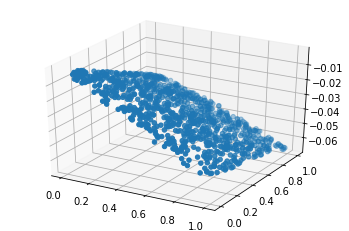

In [126]:
_y = np.apply_along_axis(ffnn.predict, axis=1, arr=X)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(X.T[0], X.T[1], _y.T);

In [127]:
ffnn.train(X, y)

Epoch 0
MSE= [0.16369526]
Epoch 1
MSE= [0.16137859]
Epoch 2
MSE= [0.15986457]
Epoch 3
MSE= [0.15824918]
Epoch 4
MSE= [0.15651849]
Epoch 5
MSE= [0.15465508]
Epoch 6
MSE= [0.15290765]
Epoch 7
MSE= [0.15127663]
Epoch 8
MSE= [0.14996013]
Epoch 9
MSE= [0.14884515]
Epoch 10
MSE= [0.14787752]
Epoch 11
MSE= [0.147178]
Epoch 12
MSE= [0.14631979]
Epoch 13
MSE= [0.14574347]
Epoch 14
MSE= [0.1452736]
Epoch 15
MSE= [0.14470441]
Epoch 16
MSE= [0.14417111]
Epoch 17
MSE= [0.14358475]
Epoch 18
MSE= [0.14329901]
Epoch 19
MSE= [0.14257702]
Epoch 20
MSE= [0.14212038]
Epoch 21
MSE= [0.14179028]
Epoch 22
MSE= [0.14102333]
Epoch 23
MSE= [0.14047876]
Epoch 24
MSE= [0.14002125]
Epoch 25
MSE= [0.13963617]
Epoch 26
MSE= [0.13915712]
Epoch 27
MSE= [0.13901169]
Epoch 28
MSE= [0.13842281]
Epoch 29
MSE= [0.13810871]
Epoch 30
MSE= [0.13783717]
Epoch 31
MSE= [0.13766482]
Epoch 32
MSE= [0.13762646]
Epoch 33
MSE= [0.13728764]
Epoch 34
MSE= [0.13716316]
Epoch 35
MSE= [0.13711704]
Epoch 36
MSE= [0.13693742]
Epoch 37
MSE= 

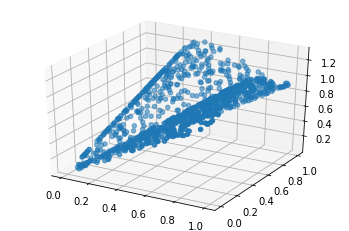

In [128]:
_y = np.apply_along_axis(ffnn.predict, axis=1, arr=X)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(X.T[0], X.T[1], _y.T);